<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  outcome                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


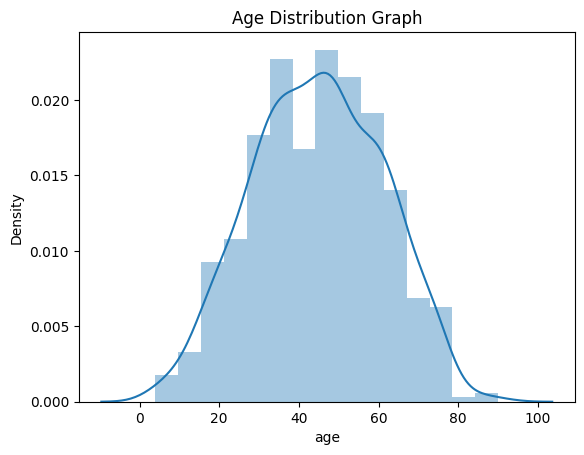

ValueError: ignored

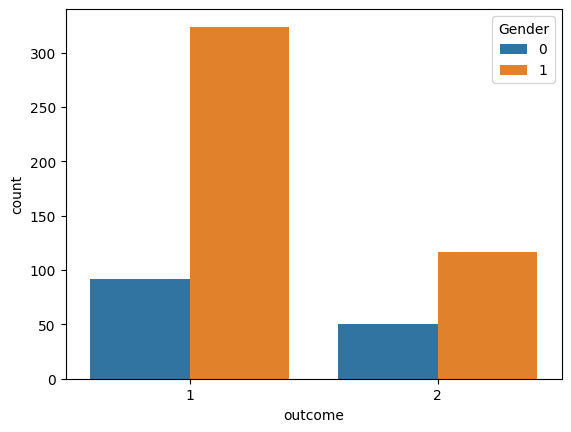

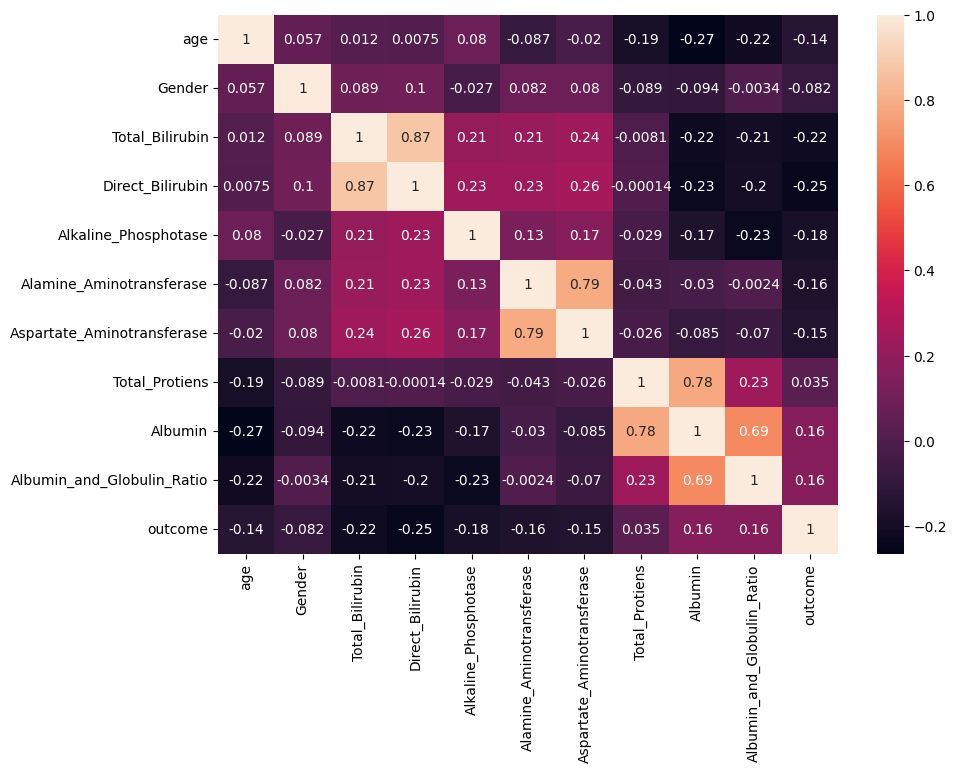

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
data=pd.read_csv('/content/drive/MyDrive/liver_patient.csv')
data.head()
data.info()
data.isnull().any()
data.isnull().sum()
from sklearn.preprocessing import LabelEncoder
Ic=LabelEncoder()
data['Gender']=Ic.fit_transform(data['Gender'])
data.describe()
sns.distplot(data['age'])
plt.title('Age Distribution Graph')
plt.show()
sns.countplot(x='outcome',hue='Gender',data=data)
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)
X=data.head()
X
from sklearn.preprocessing import scale
X_scaled=pd.DataFrame(scale(X),columns=X.columns)
X_scaled.head()
X=data.iloc[:,:-1]
y=data.outcome
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)
from imblearn.over_sampling import SMOTE
smote=SMOTE()
y_train.value_counts()
X_train = pd.DataFrame(X_train).dropna()
y_train = y_train[X_train.index]
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print(y_train_smote.value_counts())
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_smote, y_train_smote, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier()
model1.fit(X_train, y_train)
y_predict = model1.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
rfc1 = accuracy_score(y_test, y_predict)
print("Accuracy:", rfc1)
print("Classification Report:\n", classification_report(y_test, y_predict))
from sklearn.tree import DecisionTreeClassifier
model4=DecisionTreeClassifier()
model4.fit(X_train_smote, y_train_smote)
y_predict=model4.predict(X_test)
dtc1=accuracy_score(y_test, y_predict)
dtc1
pd.crosstab(y_test, y_predict)
print(classification_report(y_test, y_predict))
from sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier()
model2.fit(X_train_smote, y_train_smote)
y_predict=model2.predict(X_test)
knn1=(accuracy_score(y_test, y_predict))
knn1
pd.crosstab(y_test, y_predict)
print(classification_report(y_test, y_predict))
from sklearn.linear_model import LogisticRegression
model5=LogisticRegression()
model5.fit(X_train_smote, y_train_smote)
y_predict=model5.predict(X_test)
logi1=(accuracy_score(y_test, y_predict))
logi1
pd.crosstab(y_test, y_predict)
print(classification_report(y_test, y_predict))
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
classifier=Sequential()
classifier.add(Dense(units=100, activation='relu',input_dim=10))
classifier.add(Dense(units=50, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_history= classifier.fit(X_train, y_train ,batch_size=100,epochs=100)
model4.predict([[50,1,1.2,0.8,150,70,80,7.2,3.4,0.8]])
model1.predict([[50,1,1.2,0.8,150,70,80,7.2,3.4,0.8]])
classifier.save("liver.h5")
y_pred=classifier.predict(X_test)
y_pred
y_pred=(y_pred > 0.5)
y_pred
def predict_exit(sample_value):

	
	 sample_value= np.array(sample_value)
	
	 sample_value=sample_value.reshape(1,-1)
	
	 sample_value=scale(sample_value)
	 return classifier.predict(sample_value)

sample_value=[[50,1,1.2,0.8,150,70,80,7.2,3.4,0.8]]
if predict_exit(sample_value)>0.5:
	print('Prediction: Liver Patient')
else:
	print('Prediction: Healthy')
acc_smote= [['KNN Classifier', knn1], ['RandomForestClassifier', rfc1],
             ['DecisionTreeClassifier', dtc1], ['LogisticRegression',logi1]]
Liverpatient_pred=pd.DataFrame(acc_smote, columns=['classification models', 'accuracy_score'])
Liverpatient_pred
plt.figure(figsize=(7,5))
plt.xticks(rotation=90)
plt.title('Classification models & accuracy scores after SMOTE', fontsize=18)
sns.barplot(x="classification models", y="accuracy_score", data=Liverpatient_pred,palette="Set2")
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X,y)
model.feature_importances_
dd=pd.DataFrame(model.feature_importances_,index=X.columns).sort_values(0,ascending=False)
dd
dd.plot(kind='barh', figsize=(7,6))
plt.title("FEATURE IMPORTANCE", fontsize=14)






In [2]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
